<a href="https://colab.research.google.com/github/GeorginaFlesia/GFstuff/blob/master/AyVd_Grupo_Palas_Atenea_Ejercicios_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

**Integrantes Grupo 'Palas Atenea'**
* Bosch Daniela
* Gherra C Estefanía Inés
* Gómez Federico?
* Iberra Yanina Vanesa
* Mantovani Luciano
* Palacio Pastor Natalí


# Brief


1. Importación de Librerías
2. Lectura del Dataset
3. Ejercicio 1
4. Ejercicio 2
5. Ejercicio 3



# Importación de librerías

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

# Lectura del dataset

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


## **Ejercicio 1**

Reponder: **¿Si uno tiene más de 5 años de experiencia, la probabilidad de cobrar más que el promedio aumenta? ¿Estos eventos, son independientes?**


#### **Hipótesis**

1.   Tener más años de experiencia significa que se cobra más.
2.   Los siguientes eventos NO son independientes:
  
  A = {personas que cobran más que el promedio} = {ωi : salary_monthly_NETO > avg(salary_monthly_NETO) }<br>
  B = {personas con más de 5 años de experiencia} = {ωi : profile_years_experience > 5 }

### **Identificar las variables**

1.   Para los años de experiencia usaremos la variable 'profile_years_experience'.

2.   Para el salario usaremos el salario Neto, ingresado en la variable 'salary_monthly_NETO'.


*   **Asunción**: cada una de nuestros eventos es independiente e idénticamente distribuido, es decir, que P({ωi}) = 1/k.



### **Análisis de hipótesis 1**
Tener más años de experiencia significa que se cobra más.

In [ ]:
salary_col = 'salary_monthly_NETO'
avg_salary = df[salary_col].mean()
avg_salary

94907.9491018188

In [ ]:
is_above_avg = df[salary_col] > avg_salary # A: serie con true/false si el salario supera o no la media del salario
#print(is_above_avg)
experience_greater_5 = df.profile_years_experience > 5 # B: serie con true/false si tiene o no más de 5 años de experiencia
#print(experience_greater_5)
intersection_count = len(df[is_above_avg & experience_greater_5])
intersection_count # A intersección B

1634

In [ ]:
# Probabilidad del evento A
p_a = len(df[is_above_avg]) / len(df) # p(A)
p_a

0.33125512715340444

In [ ]:
# Probabilidad del evento B
p_b = len(df[experience_greater_5]) / len(df) # p(B)
p_b

0.5873666940114848

In [ ]:
# Probabilidad conjunta: probabilidad de que una persona cobre más que el promedio y que tenga más de 5 años de experiencia.
p_conj = intersection_count / len(df) # p(A int B)
p_conj

0.26808859721082856

In [ ]:
# Probabilidad condicional de que el salario esté por encima del promedio, 
# suponiendo que ocurre el evento de tener más de 5 años de experiencia, se calcula como:
# p(A|B) = p(A int B) / p(B) con p(B) != 0
p_cond = p_conj / p_b # p(A cond B)
p_cond

0.45642458100558664

**Conclusión**:

Compararamos éste valor de probabilidad condicional con p(a). Como p_cond > p_a (0.45 > 0.33), entonces la hipótesis I es verdadera. 


### **Análisis de hipótesis 2**
Los eventos A y B NO son independientes.

A y B se dicen conjuntos independientes si:

p(A int B) = p(A)*p(B)

In [ ]:
p_a_por_p_b = p_a * p_b  # p(A) * p(B)
p_a_por_p_b

0.1945682289104492

**Conclusión**:

La probabilidad de la intersección es 0.26, pero p(A)*p(B) = 0.19, por lo tanto, al ser valores diferentes NO son eventos independientes (Hipótesis 2 es verdadera).

## **Ejercicio 2**

Responder: **¿Cómo afecta el nivel de estudios en el salario de los programadores en Argentina?**

#### **Hipótesis**
1. El nivel de estudio de los programadores afecta su salario de forma positiva. (i.e: Tener más nivel de estudio significa que se cobra más.)

2. Los siguientes eventos NO son independientes:
  
  A = {personas que cobran más que el promedio} = {ωi : salary_monthly_NETO > avg(salary_monthly_NETO) }<br>
  B = {personas con nivel de estudio igual o superior a Universitario} = {ωi : profile_studies_level in ['Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado']}

### **Identificar las variables**

1.   Para el nivel de estudio usaremos la variable categórica ordinal 'profile_studies_level' y veremos si tiene impacto el estado del nivel de estudio informado en la variable 'profile_studies_level_state'.

2.   Para el salario usaremos el salario Neto, ingresado en la variable 'salary_monthly_NETO'.


*   **Asunción**: cada una de nuestros eventos es independiente e idénticamente distribuido, es decir, que P({ωi}) = 1/k.

#### **Manejo de valores faltantes en las variables de interés**

In [ ]:
# Verificamos si hay valores faltantes en las variables de interés.
percent_of_null_values = df[
                            ["profile_studies_level", "profile_studies_level_state", "salary_monthly_NETO", "salary_monthly_BRUTO"]
                            ].isnull().sum() / len(df)*100
percent_of_null_values # son 212 filas de 6095.

profile_studies_level          0.000000
profile_studies_level_state    0.000000
salary_monthly_NETO            3.478261
salary_monthly_BRUTO           0.000000
dtype: float64

In [ ]:
df.drop(df[df[salary_col].isnull()].index, inplace = True)
df.reset_index(drop=True, inplace=True)
df.shape

(5883, 48)

#### **Manejo de outliers en las variables de interés**

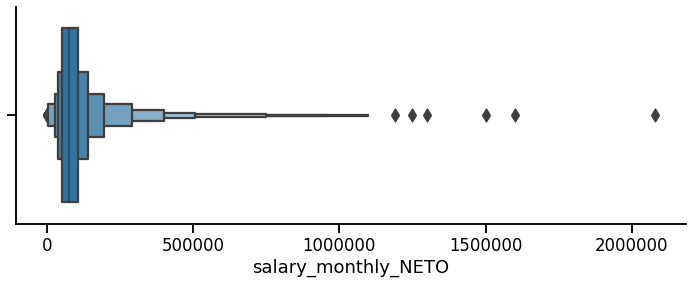

In [ ]:
plt.figure(figsize=(12, 4))
seaborn.boxenplot(x=df[salary_col])
seaborn.despine()
plt.ticklabel_format(style='plain', axis='x')

Eliminamos outliers con la función 'clean_outliers'.

In [ ]:
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

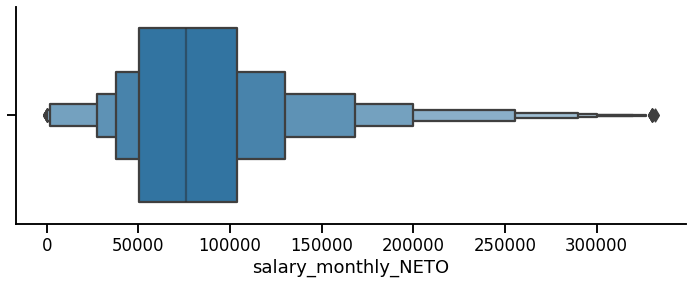

In [ ]:
data = clean_outliers(df, salary_col)
data.reset_index(drop=True, inplace=True)
plt.figure(figsize=(12, 4))
seaborn.boxenplot(x=data[salary_col]) # usamos el dataframe devuelto por la función clean_outliers, filtrado en la columna de salario Neto
seaborn.despine()
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
data[salary_col].describe()

count      5741.000000
mean      83627.618458
std       50278.152420
min           1.000000
25%       50400.000000
50%       75900.000000
75%      104000.000000
max      332100.000000
Name: salary_monthly_NETO, dtype: float64

Vemos que existe como mínimo el valor 1.0. Tratemos de eliminar esos outliers.

In [ ]:
data = data[data[salary_col]>10000]
data.reset_index(drop=True, inplace=True)

De aquí en adelante trabajaremos con el dataframe 'data', que no contiene filas con valores faltantes en la variable 'salary_monthly_NETO', y han sido eliminados los outliers de esa misma variable.

### **Análisis de hipótesis 1**
Tener más nivel de estudio significa que se cobra más

In [ ]:
avg_salary = data[salary_col].mean()
avg_salary

86676.45941845766

In [ ]:
is_above_avg = data[salary_col] > avg_salary # A: serie con tru/efalse si el salario supera o no la media del salario
#print(is_above_avg)
profile_studies_level_greater_univ = data.profile_studies_level.isin(['Universitario', 'Posgrado', 'Doctorado', 'Posdoctorado']) # B: serie con true/false si tiene o no más de 5 años de experiencia
#print(profile_studies_level_greater_univ)
intersection_count = len(data[is_above_avg & profile_studies_level_greater_univ])
intersection_count # A intersección B

1806

In [ ]:
# Probabilidad del evento A
p_a = len(data[is_above_avg]) / len(data) # p(A)
p_a

0.40744085244717354

In [ ]:
# Probabilidad del evento B
p_b = len(data[profile_studies_level_greater_univ]) / len(data) # p(B)
p_b

0.7374029257720788

In [ ]:
# Probabilidad conjunta: probabilidad de que una persona cobre más que el promedio y que tenga un nivel de estudio igual o mayor a universitario.
p_conj = intersection_count / len(data) # p(A int B)
p_conj

0.32616940581542353

In [ ]:
# Probabilidad condicional de que el salario esté por encima del promedio, 
# suponiendo que ocurre el evento de tener un nivel de estudio igual o mayor a universitario, se calcula como:
# p(A|B) = p(A int B) / p(B) con p(B) != 0
p_cond = p_conj / p_b # p(A cond B)
p_cond

0.4423218221895665

**Conclusión**:

Compararamos éste valor de probabilidad condicional con p(a). Como p_cond > p_a (0.44 > 0.40), entonces la hipótesis 1 es verdadera.

### **Análisis de hipótesis 2**

Los eventos A y B NO son independientes.

A y B se dicen conjuntos independientes si:

p(A int B) = p(A)*p(B)

In [ ]:
p_a_por_p_b = p_a * p_b  # p(A) * p(B)
p_a_por_p_b

0.3004480766736156

**Conclusión**:

La probabilidad de la intersección es 0.32, pero p(A)*p(B) = 0.30, por lo tanto, al ser valores diferentes NO son eventos independientes, la hipótesis 2 es verdadera.

### **Análisis del impacto de las variables categóricas**

- 'profile_studies_level'
- 'profile_studies_level_state'

Veamos la cantidad de valores por cada una de éstas categorías de nivel de estudio y su estado.

In [ ]:
# Cantidad de observaciones (personas) luego de la "curación de datos"
len(data)

5537

In [ ]:
# Tabla de frecuencias absolutas de la variable Nivel de estudio
data['profile_studies_level'].value_counts()

Universitario    3757
Terciario        1043
Secundario        409
Posgrado          299
Doctorado          25
Posdoctorado        2
Primario            2
Name: profile_studies_level, dtype: int64

In [ ]:
# Tabla de frecuencias absolutas de la variable Estado del nivel de estudio

data['profile_studies_level_state'].value_counts()

Completado    2644
En curso      1558
Incompleto    1335
Name: profile_studies_level_state, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

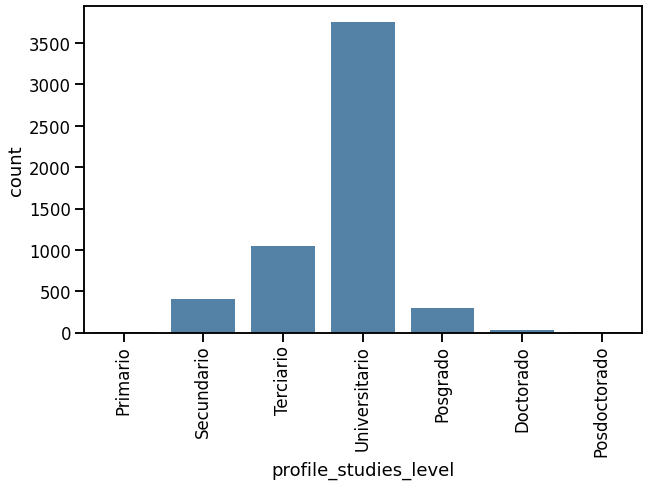

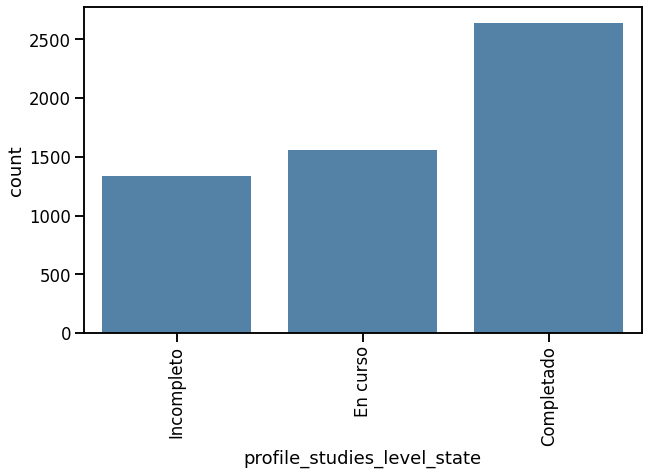

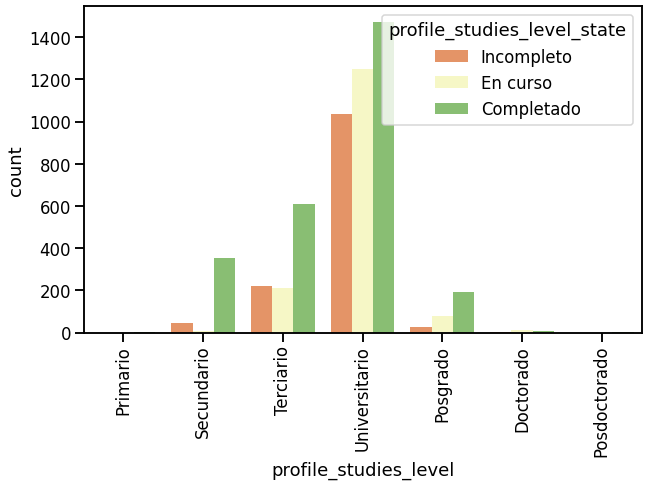

In [ ]:
# Gráfico de barras de: Nivel de estudio y estado de completitud

plt.figure(figsize=(10, 6))
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
seaborn.countplot(data['profile_studies_level'], color='steelblue', order=sorted_studies_levels)
plt.xticks(rotation=90)

plt.figure(figsize=(10, 6))
sorted_studies_level_state = ['Incompleto', 'En curso', 'Completado']
seaborn.countplot(data['profile_studies_level_state'], color='steelblue', order=sorted_studies_level_state)
plt.xticks(rotation=90)

plt.figure(figsize=(10, 6))
seaborn.countplot(data=data, x="profile_studies_level", hue="profile_studies_level_state", order=sorted_studies_levels, hue_order=sorted_studies_level_state, palette='RdYlGn')
plt.xticks(rotation=90)

In [ ]:
# Tabla de contingencia entre nivel de estudio y estado de completitud (valores relativos al total general).

pd.crosstab(index=data['profile_studies_level'],
            columns=data['profile_studies_level_state'], margins=True, normalize ='all')

profile_studies_level_state,Completado,En curso,Incompleto,All
profile_studies_level,,,,
Doctorado,0.001625,0.002167,0.000722,0.004515
Posdoctorado,0.000361,0.000000,0.000000,0.000361
Posgrado,0.035037,0.013906,0.005057,0.054000
Primario,0.000361,0.000000,0.000000,0.000361
Secundario,0.064114,0.001625,0.008127,0.073867
Terciario,0.109987,0.038288,0.040094,0.188369
Universitario,0.266029,0.225393,0.187105,0.678526
All,0.477515,0.281380,0.241105,1.000000


In [ ]:
# Tabla de contingencia entre nivel de estudio y estado de completitud 
# (valores relativos de la completitud, respecto al total por filas o nivel de estudio).

pd.crosstab(index=data['profile_studies_level'],
            columns=data['profile_studies_level_state'], margins=True, normalize ='index')

profile_studies_level_state,Completado,En curso,Incompleto
profile_studies_level,,,
Doctorado,0.360000,0.480000,0.160000
Posdoctorado,1.000000,0.000000,0.000000
Posgrado,0.648829,0.257525,0.093645
Primario,1.000000,0.000000,0.000000
Secundario,0.867971,0.022005,0.110024
Terciario,0.583893,0.203260,0.212848
Universitario,0.392068,0.332180,0.275752
All,0.477515,0.281380,0.241105


Observaciones hasta el momento:


*   La mayoría de los trabajadores respondieron como nivel de estudio "Universitario" (3757 personas, representan el 67,8% del total), y en segundo lugar nivel Terciario (18.8% del total).
*   Las categorías Nivel Primario, Doctorado y Posdoctorado, tienen muy pocas respuestas (2, 25, 2) en relación al total general de registros (5537). Representan menos del 1% del total de casos.
*   De los que respondieron Nivel Terciario, la mayoría (el 58% de ellos) lo han completado. El resto se divide en partes iguales entre los que lo dejaron incompleto y quienes aún están en curso.
*   Entre los que respondieron nivel Universitario, son más los que lo completaron (39% de ellos), pero no distan mucho en cantidad respecto a quienes aún están cursando (33% de ellos) y entre quienes declararon tenerlo incompleto (27,5%).
*    Por último, una gran mayoría de los que respondieron Nivel Secundario o Posgrado, completaron su nivel.

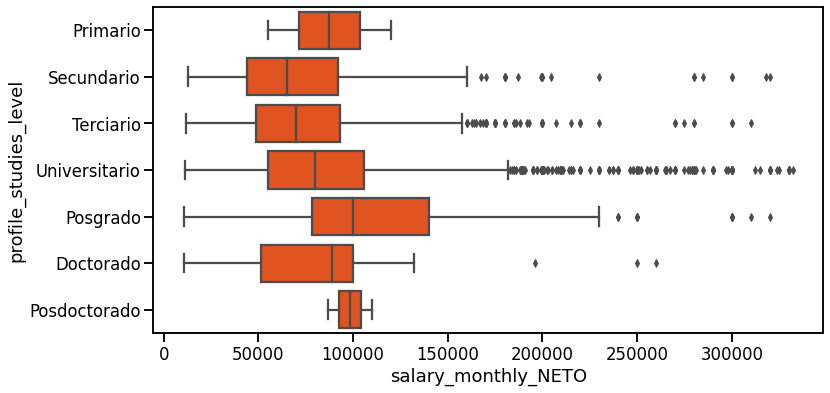

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=data, x='salary_monthly_NETO', y='profile_studies_level',
                color='orangered', order=sorted_studies_levels)
plt.ticklabel_format(style='plain', axis='x')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


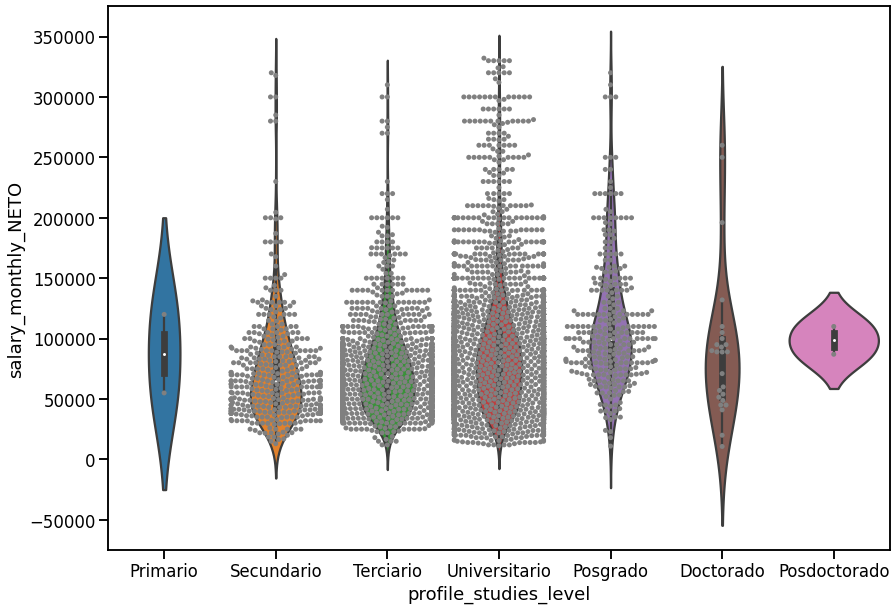

In [ ]:
plt.figure(figsize=(14, 10))
ax = seaborn.violinplot(data=data, y='salary_monthly_NETO', x='profile_studies_level', order=sorted_studies_levels )

ax = seaborn.swarmplot(data=data, y='salary_monthly_NETO', x='profile_studies_level', order=sorted_studies_levels,
                       color="grey")
plt.show()

In [ ]:
data.groupby( data["profile_studies_level"])["salary_monthly_NETO"].describe()

,count,mean,std,min,25%,50%,75%,max
profile_studies_level,,,,,,,,
Doctorado,25.0,91879.574000,62134.910858,10700.0,51500.0,89000.0,100000.0,260000.0
Posdoctorado,2.0,98500.000000,16263.455967,87000.0,92750.0,98500.0,104250.0,110000.0
Posgrado,299.0,113233.116589,53870.657780,11000.0,78500.0,100000.0,140000.0,320000.0
Primario,2.0,87500.000000,45961.940777,55000.0,71250.0,87500.0,103750.0,120000.0
Secundario,409.0,76079.253496,47333.728588,13000.0,44000.0,65000.0,92000.0,320000.0
Terciario,1043.0,77224.055801,40973.955479,12000.0,49015.0,70000.0,93000.0,310000.0
Universitario,3757.0,88299.377085,49157.948668,11300.0,55000.0,80000.0,106000.0,332100.0


**Observaciones:**

- Concentramos la atención desde el nivel Secundario hasta el Posgrado, ya que los niveles Primario, Doctorado y Posdoctorado registraron muy pocos casos.

- Al observar las medianas de los salarios, vemos que las mismas aumentan a medida que avanza el nivel de estudio declarado (similar con el Q1).

- Las distribuciones muestran asimetría hacia la derecha, y por ello el 50% de los salarios netos se concentran en valores menores al promedio, el cual se ve influenciado por los salario "outliers" o ingresos mucho mayores al promedio, los cuales son recibidos por una baja proporción de trabajadores en relación al total. Los trabajadores con "Posgrado" parecerían tener un menor grado de asimetría respecto a los demás.


**¿Cómo impacta el salario neto de acuerdo al nivel de completitud de los estudios?**

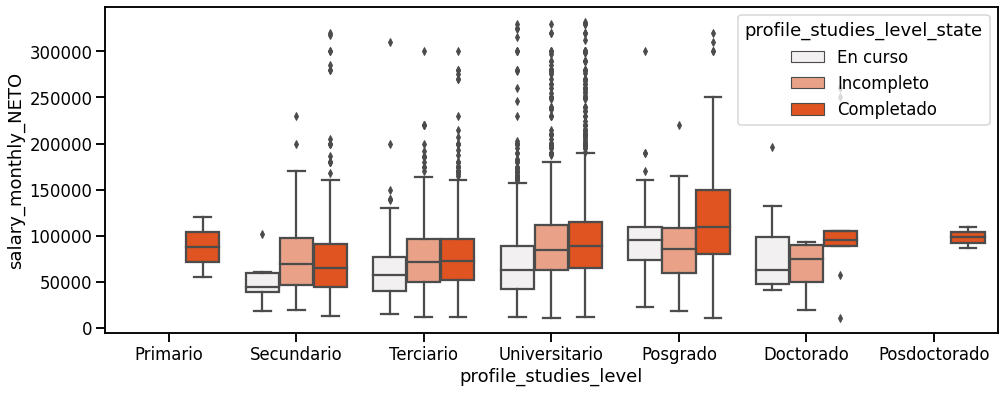

In [ ]:
fig = plt.figure(figsize=(16,6))
seaborn.boxplot(data=data, y=data.salary_monthly_NETO,x='profile_studies_level', hue=data.profile_studies_level_state, 
                color='orangered', order=sorted_studies_levels, hue_order=["En curso", "Incompleto", "Completado"] )
plt.ticklabel_format(style='plain', axis='y')

**Conclusiones**:

- En este gráfico se muestra la distribución de salarios netos al interior de cada nivel educativo, de acuerdo a su estado de completitud

- Recordar: los niveles primario, doctorado y posdoctorado registran pocas observaciones, por lo que se concentra el análisis en los demás niveles.

- Vale decir que guarda coherencia con los gráficos anteriores, ya que las personas que tienen un título universitario o de posgrado ganan más en general que los que no. Pero la diferencia en el salario neto entre tener un título universitario completo, y uno incompleto, es muy pequeña.

- En los boxplot se observa que la mediana de los salarios de quienes completaron los niveles secundario, terciario, y universitario, no se diferencia mucho de quienes dejaron incompleto dicho nivel. Sin embargo, sí resulta mayor la mediana del salario de quienes lo completaron, en relación a la de quienes declararon estar cursando todavía el correspondiente nivel. Esto puede deberse a que quienes "están cursando" quizá dedican menos horas al trabajo (y por ende su salario resultaría menor), que quienes dejaron incompleto cada nivel educativo en cuestión.

- En el caso de los trabajadores con Posgrado se ve algo distinto: la mediana de los salarios netos de quienes completaron el nivel, es mayor a la de los que lo están cursando, y esta última mayor a la de los que lo tienen incompleto.

- Los comportamientos observados podrían explicarse por el tipo de rubro (Tecnologías de la Información) analizado bajo una perspectiva económica o de mercado. En particular, coexiste una fuerte demanda por parte de las empresas de trabajadores TI, frente a una oferta de empleados aún bastante rígida e insuficiente para satisfacerla con gente "recibida". Es así que se contratan personas con título, y sin título prácticamente al mismo salario, suponiendo que ambos tipos cumplen los requisitos exigidos en las entrevistas de selección (las empresas valorarían más el saber resolver los problemas planteados en la entrevista, y trabajar una determinada cantidad de horas o cumplir con los plazos de entrega de proyectos, que el hecho de contar con un título formal o no).

## **Ejercicio 3**

1. Analice las variables `'salary_monthly_BRUTO'` (salario mensual Bruto) y `'salary_monthly_NETO'` (salario Neto) en conjunto, que comentarios puede hacer al respecto?

2. Genere una nueva variable `'salary_monthly_DESCUENTOS'= 'salary_monthly_BRUTO'-'salary_monthly_NETO'`, es decir que contenga los descuentos mensuales. 
  1. ¿Qué concepto matemático utiliza para entender la nueva variable?
  2. Calcule de dos fomas diferentes la media muestral de dicha variable. 
  2. Analice la distribución de los datos, su rango de valores e interprete. ¿Qué puede estar pasando? ¿Qué propone como solución?

3. Considerando toda la base:
  1. ¿Que pregunta le interesaría responder?
  2. ¿Que par de variables le conviene analizar en conjunto? Visualice su distribución conjunta. 
  3. ¿Qué medidas podrían resumir la información de la distribución de esas variables? visualícelas e interprete cada una.

4. Resuma:
  1. Si está queriendo analizar el comportamiento conjunto de dos variables, ¿qué gráficos y medidas conviene utilizar? 
  2. ¿Y si ambas variables son numéricas? 
  3. ¿Y si ambas son categóricas? 
  4. ¿Y si una es categórica y la otra numérica? 

### **Punto 1**

Analice las variables `'salary_monthly_BRUTO'` (salario mensual Bruto) y `'salary_monthly_NETO'` (salario Neto) en conjunto, que comentarios puede hacer al respecto?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


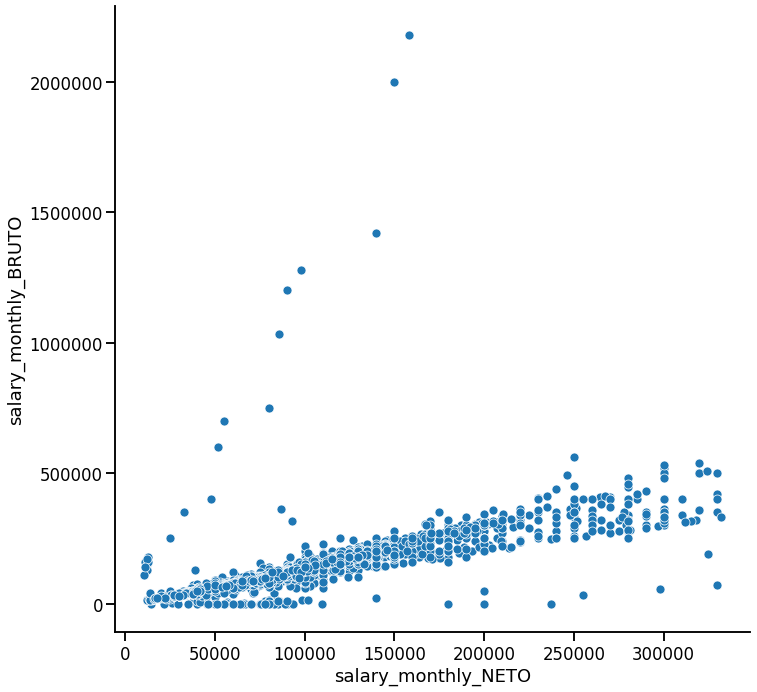

In [ ]:
max_age = 99
seaborn.pairplot(data=data[df.profile_age < max_age], y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=1, height=10)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

**Observaciones**:

- Una mayor concentración en la línea principal.
- Se ve principalmente una relación positiva entre las variables salario bruto y salario neto.  Además, se ve que hay una importante densidad de datos en donde el  salario bruto es mayor al salario neto, lo cual es lógico y esperado porque el neto surge de descontar las contribuciones y aportes personales al salario bruto.
- El bruto está por encima del neto, mucha densidad (registrados formalmente), en los 500.000 para abajo.
- La linea de abajo bruto menor a neto, (en negro).
- Bruto mucho mayor a neto (impuesto a las ganancias?) o gente que tipeó mal.

### **Punto 2**

Genere una nueva variable `'salary_monthly_DESCUENTOS'= 'salary_monthly_BRUTO'-'salary_monthly_NETO'`, es decir que contenga los descuentos mensuales. 
  1. ¿Qué concepto matemático utiliza para entender la nueva variable? 
  
  Podemos usar la resta o el cociente. Y utilizamos el concepto de media y observamos que 'la media de las restas es igual a la resta de las medias'.
  
  2. Calcule de dos fomas diferentes la media muestral de dicha variable. 
  
  Podemos obtener la media de la resta o la resta de las medias.
  
  3. Analice la distribución de los datos, su rango de valores e interprete. ¿Qué puede estar pasando? ¿Qué propone como solución?

In [ ]:
# Nuevas columnas
data['salary_monthly_DESCUENTOS'] = data['salary_monthly_BRUTO'] - data['salary_monthly_NETO']
data['salary_monthly_DESCUENTOS_COCIENTE'] = data['salary_monthly_BRUTO'] / data['salary_monthly_NETO']

In [ ]:
# Podemos obtener la media de la resta o la resta de las medias.
mean1 = data['salary_monthly_DESCUENTOS'].mean()
print("Media de la nueva variable obtenida de la resta: ", mean1)
# Podemos obtener la media de la resta o la resta de las medias.
mean2 = data['salary_monthly_BRUTO'].mean() - data['salary_monthly_NETO'].mean()
print("Media de la nueva variable obtenida de la resta: ", mean2)

Media de la nueva variable obtenida de la resta:  26589.193131840355
Media de la nueva variable obtenida de la resta:  26589.193131840322


In [ ]:
# Rangos
print("Salary NETO min: {0} , max: {1}".format(data['salary_monthly_NETO'].min(), data['salary_monthly_NETO'].max()))
print("Salary BRUTO min: {0} , max: {1}".format(data['salary_monthly_BRUTO'].min(), data['salary_monthly_BRUTO'].max()))
print("Salary DESCUENTOS min: {0} , max: {1}".format(data['salary_monthly_DESCUENTOS'].min(), data['salary_monthly_DESCUENTOS'].max()))
print("Salary DESCUENTOS COCIENTE min: {0} , max: {1}".format(data['salary_monthly_DESCUENTOS_COCIENTE'].min(), data['salary_monthly_DESCUENTOS_COCIENTE'].max()))

Salary NETO min: 10700.0 , max: 332100.0
Salary BRUTO min: 1.0 , max: 2180000.0
Salary DESCUENTOS min: -260000.0 , max: 2022000.0
Salary DESCUENTOS COCIENTE min: 8.421052631578947e-06 , max: 14.166666666666666


In [ ]:
# Casos donde el salario bruto es menor que el neto.
len(data[data['salary_monthly_DESCUENTOS']<0])

146

**Conclusiones**

- Se puede ver en el rango de los descuentos que existen valores negativos, son los casos donde el salario neto se ingresó con un valor mayor al bruto, lo cual no es común, pueden ser casos donde se cobra una parte del sueldo en negro.
- Se decide eliminar los casos en los que el salario bruto es menor que el salario neto (146 casos).

In [ ]:
print(data.shape)
data.drop(data[data['salary_monthly_DESCUENTOS']<0].index, inplace = True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

(5537, 50)
(5391, 50)


### **Punto 3**

Considerando toda la base:
  1. ¿Que pregunta le interesaría responder?
  2. ¿Que par de variables le conviene analizar en conjunto? Visualice su distribución conjunta. 
  3. ¿Qué medidas podrían resumir la información de la distribución de esas variables? visualícelas e interprete cada una.

Analicemos la relacion entre genero y salario percibido. ¿Las mujeres ganan menos que los hombres por el mismo trabajo?

Variables a analizar:

- salary_monthly_NETO
- profile_gender


In [ ]:
hombres=data[data.profile_gender=="Hombre"]
mujeres=data[data.profile_gender=="Mujer"]
media_h=hombres.salary_monthly_NETO.mean()
media_m=mujeres.salary_monthly_NETO.mean()
print("Salario neto promedio de un hombre: {:.2f} %" .format(media_h))
print("Salario neto promedio de una mujer: {:.2f} %" .format(media_m))
diferencia_porc= (media_h - media_m)/media_h *100
print("Diferencia de salario hombres y mujeres que programan: {:.2f} %" .format(diferencia_porc), "menos.")

Salario neto promedio de un hombre: 88840.18 %
Salario neto promedio de una mujer: 75540.91 %
Diferencia de salario hombres y mujeres que programan: 14.97 % menos.


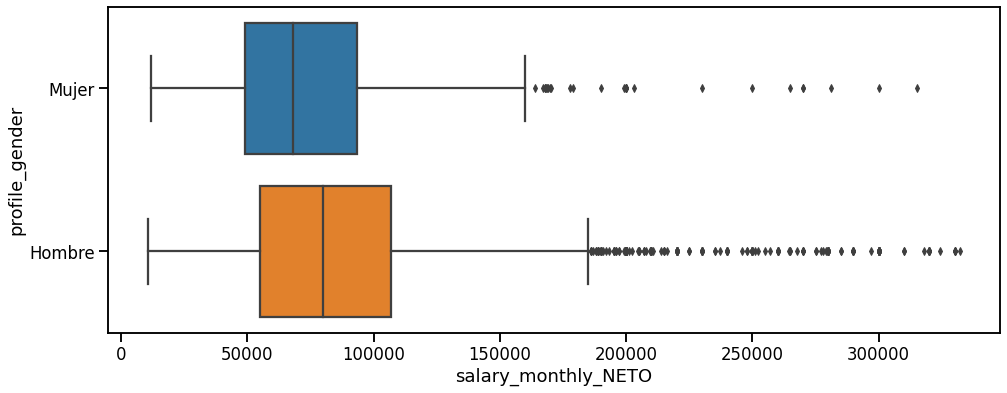

In [ ]:
fig = plt.figure(figsize=(16,6))
seaborn.boxplot(data=data, x=data.salary_monthly_NETO, y=data.profile_gender, order=["Mujer","Hombre"]  )
plt.ticklabel_format(style='plain', axis='x')

**Conclusiones:**

- Las mujeres programadoras que respondieron la encuesta, ganan en promedio 15% menos que sus pares hombres.


### **Punto 4**

Resuma:
  1. Si está queriendo analizar el comportamiento conjunto de dos variables, ¿qué gráficos y medidas conviene utilizar?

  Va a depender del tipo de variables que se quiere analizar.

  2. ¿Y si ambas variables son numéricas?

  Histograma, de barras, pairplot.

  3. ¿Y si ambas son categóricas? 

  Heatmap, countplot.

  4. ¿Y si una es categórica y la otra numérica?

  Boxplot, catplot.